# Equipo 4
### - Fernando Maldonado Cortés

<font size = 6>
<font color='blue'>
<center>
    Tarea de programación 2

# Hoja de Programación 1: Teoría de Decisión de Bayes (40 P)

En esta hoja de ejercicios, aplicaremos la teoría de decisión de Bayes en el contexto de pequeños problemas bidimensionales. Para ello, haremos uso del trazado 3D (3D plotting). A continuación, presentamos los conceptos básicos para construir estos gráficos en Python/Matplotlib.

### La función `numpy.meshgrid`

Para trazar funciones bidimensionales, primero debemos discretizar el espacio de entrada bidimensional. Una función básica para este propósito es `numpy.meshgrid`. El siguiente código crea una cuadrícula discreta de la superficie rectangular $[0,4] \times [0,3]$. La función `numpy.meshgrid` toma los intervalos discretizados como entrada y devuelve dos matrices de tamaño correspondientes a la superficie discretizada (es decir, la cuadrícula) y que contienen las coordenadas X e Y respectivamente.

In [1]:
import numpy as np
X,Y = np.meshgrid([0,1,2,3,4],[0,1,2,3])
print(X)
print(Y)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]


Tenga en cuenta que podemos iterar sobre los elementos de la cuadrícula comprimiendo las dos matrices `X` e `Y` que contienen cada coordenada. La función `numpy.flatten` convierte las matrices 2D en matrices unidimensionales, que luego se pueden iterar por elementos. 

In [2]:
print(list(zip(X.flatten(),Y.flatten())))

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3)]


### 3D-Plotting

Para habilitar el graficado en 3D, primero debemos cargar algunos módulos además de `matplotlib`:

In [3]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Como ejemplo, nos gustaría trazar la función de norma L2 $f(x,y) = \sqrt{x^2 + y^2}$ en el subespacio $x,y \in [-4,4]$ . Primero, creamos una malla con el tamaño apropiado:

In [4]:
R = np.arange(-4,4+1e-9,0.1)
X,Y = np.meshgrid(R,R)
print(X.shape,Y.shape)

(81, 81) (81, 81)


Aquí, hemos utilizado una discretización con pequeños incrementos de 0,1 para producir un gráfico con mejor resolución. La malla resultante tiene un tamaño (81x81), es decir, aproximadamente 6400 puntos. La función $f$ necesita ser evaluada en cada uno de estos puntos. Esto se logra mediante la aplicación de operaciones por elementos en las matrices de la malla. Por lo tanto, la norma en cada punto de la cuadrícula se calcula como:

In [5]:
F = (X**2+Y**2)**.5
print(F.shape)

(81, 81)


Los valores de la función resultante son del mismo tamaño que la malla. Tomar 'X', 'Y', 'F' en conjunto da como resultado una lista de aproximadamente 6400 conjuntos de tres puntos que representan las coordenadas x, y y z en el espacio tridimensional donde se debe trazar la función. El gráfico 3D ahora se puede construir fácilmente mediante la función `scatter` de `matplotlib.pyplot`.

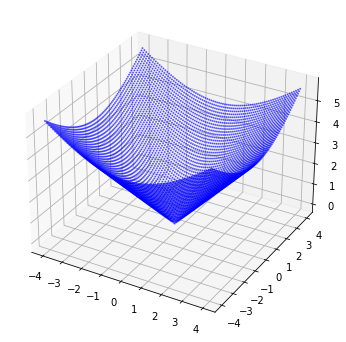

In [6]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,F,s=1,alpha=0.5,c='blue')

Los parámetros `s` y `alpha` controlan el tamaño y la transparencia de cada punto de datos. Existen otras variantes de gráficos en 3D (por ejemplo, gráficos de superficie), sin embargo, el gráfico de dispersión es el enfoque más simple, al menos conceptualmente. Habiendo presentado cómo trazar fácilmente funciones 3D en Python, ahora podemos analizar distribuciones de probabilidad bidimensionales con esta misma herramienta.

## Ejercicio 1: Distribuciones gaussianas (5+5+5 P)

Usando la técnica presentada anteriormente, nos gustaría trazar una distribución de probabilidad gaussiana normal con un vector promedio $\mu = (0,0)$ y una matriz de covarianza $\Sigma = I$, también conocida como distribución normal estándar. Consideramos la misma discretización que arriba (es decir, una cuadrícula de -4 a 4 usando un tamaño de paso 0.1). Para espacios de entrada bidimensionales, la distribución normal estándar viene dada por:
$$
p(x,y) = \frac{1}{2\pi}e^{-0.5 (x^2+y^2)}.
$$
Esta distribución suma $1$ cuando se integra sobre $\mathbb{R}^2$. Sin embargo, no suma $1$ cuando se suma sobre el espacio discretizado (es decir, la cuadrícula). En su lugar, podemos trabajar con una distribución tipo Gaussiana discretizada:
$$
P(x,y) = \frac1Z e^{-0.5 (x^2+y^2)} \qquad \text{con} \quad Z = \sum_{x,y} e^{-0.5 (x^ 2+y^2)}
$$
donde la suma recorre todo el espacio discretizado.

* **Calcule la distribución $P(x,y)$ y grafíquela.**

In [7]:
#Definimos el mallado de -4 a 4 con incrementos de 0.1
R = np.arange(-4,4+1e-9,0.1)
X,Y = np.meshgrid(R,R)
print(X.shape,Y.shape)

(81, 81) (81, 81)


In [8]:
#Calculo de Z
def Z(A,B):
    exy=np.exp(-0.5*(A**2+B**2))
    suma=0
    for i in range(81):
        for j in range(81):
            suma+=exy[i][j]
    return suma

In [9]:
def Gauss_disc(A,B):
    F=(1/Z(A,B))*np.exp(-0.5*(A**2+B**2))
    return F

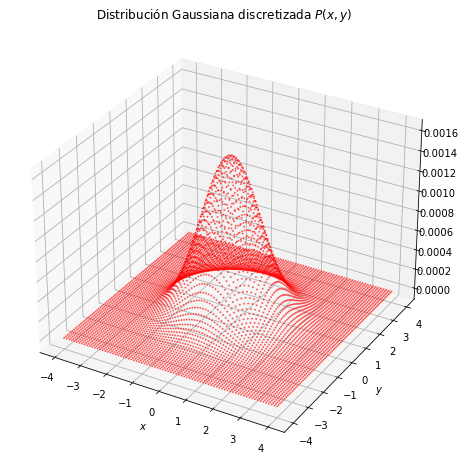

In [10]:
#Gráfica de la distribución
P=Gauss_disc(X,Y)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,P,s=1,alpha=0.5,c='red')
plt.title('Distribución Gaussiana discretizada $P(x,y)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

* **Calcule la distribución condicional $Q(x,y) = P((x,y) | \sqrt{x^2+y^2} \geq 1)$, y grafíquela.**

In [11]:
X1,Y1=[],[]
for i in range(81):
    aux,auy=[],[]
    for j in range(81):
        if (X[i,j]**2+Y[i,j]**2>1) or (X[i,j]**2+Y[i,j]**2==1):
            aux.append(X[i,j])
            auy.append(Y[i,j])
        else:
            aux.append(0)
            auy.append(0)
    X1.append(aux)
    Y1.append(auy)

X1=np.array(X1)
Y1=np.array(Y1)#Son los puntos que cumplen la condicion x^2+y^2>=1

In [12]:
Q=Gauss_disc(X1,Y1)
for i in range(81):
    for j in range(81):
        if (X1[i,j]==0) or (Y1[i,j]==0):
            Q[i,j]=0 #Mandamos a cero los puntos del circulo unitario

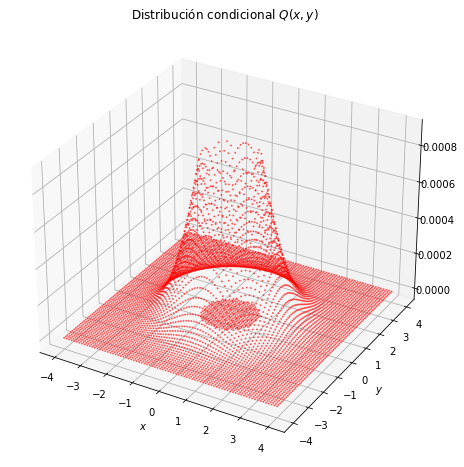

In [13]:
#Gráfica de la distribución condicional
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Q,s=1,alpha=0.5,c='red')
plt.title('Distribución condicional $Q(x,y)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

* **Margenizar la distribución condicionada $Q(x,y)$ sobre $y$ y trazar la distribución resultante $Q(x)$.**

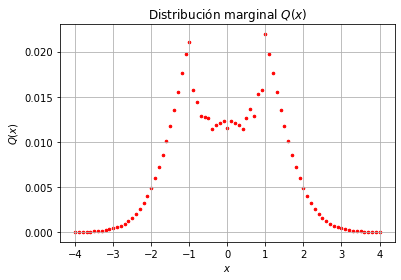

In [14]:
plt.scatter(X[0],np.sum(Q, axis=1),c='red',s=6.6) #Ponemos axis=1 para sumar sobre los valores de y
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$Q(x)$')
plt.title('Distribución marginal $Q(x)$')
plt.show()

## Ejercicio 2: Clasificación Bayesiana (5+5+5 P)

Deje que las dos coordenadas x e y se representen ahora como un vector bidimensional $\boldsymbol{x}$. Consideremos dos clases $\omega_1$ y $\omega_2$ con distribuciones gaussianas generadoras de datos $p(\boldsymbol{x}|\omega_1)$ y $p(\boldsymbol{x}|\omega_2)$ de vectores medios
$$\boldsymbol{\mu}_1 = (-0.5,-0.5) \quad \text{y} \quad \boldsymbol{\mu}_2 = (0.5,0.5)$$
respectivamente, y la misma matriz de covarianza
$$\Sigma = \begin{pmatrix}1.0&0\\0&0.5\end{pmatrix}.$$
Las clases ocurren con probabilidad $P(\omega_1) = 0.9$ y $P(\omega_2) = 0.1$. El análisis nos dice que en tal escenario, el límite de decisión óptimo entre las dos clases debería ser lineal. Nos gustaría verificar esto computacionalmente aplicando la teoría de decisión de Bayes en distribuciones discretizadas en forma de cuadrícula.

* **Utilizando la misma cuadrícula que en el Ejercicio 1, discretice las dos distribuciones generadoras de datos $p(\boldsymbol{x}|\omega_1)$ y $p(\boldsymbol{x}|\omega_2)$ (es decir, cree distribuciones discretas distribuciones $P(\boldsymbol{x}|\omega_1)$ y $P(\boldsymbol{x}|\omega_2)$ en la cuadrícula), y grafíquelas con diferentes colores.**

La distribución Gaussiana en este caso es
$$f_\mathbf{x}(x,y)=\frac{1}{2\pi\sqrt{|\Sigma|}}\exp\left[-\frac{1}{2}(\mathbf{x}-\mu)^T\Sigma^{-1}(\mathbf{x}-\mu)\right]$$
con $|\Sigma|=0.5$ y $\Sigma^{-1}=\frac{1}{0.5}\begin{pmatrix}0.5&0\\0&1.0\end{pmatrix}=\begin{pmatrix}1&0\\0&2\end{pmatrix}$ 

Para la primer clase tenemos
$$(\mathbf{x}-\mu_1)^T\Sigma^{-1}(\mathbf{x}-\mu_1)=(x+0.5\;\;\;y+0.5)\begin{pmatrix}1&0\\0&2\end{pmatrix}\begin{pmatrix}x+0.5\\ y+0.5\end{pmatrix}=(x+0.5\;\;\;y+0.5)\begin{pmatrix}x+0.5\\ 2(y+0.5)\end{pmatrix}=(x+0.5)^2+2(y+0.5)^2$$
Por lo tanto su ditribución está dada como
$$P_1(x,y)=\frac{\sqrt{2}}{2\pi}e^{-0.5\left[(x+0.5)^2+2(y+0.5)^2\right]}$$
Análogamente se llega a la distribución de la segunda clase
$$P_2(x,y)=\frac{\sqrt{2}}{2\pi}e^{-0.5\left[(x-0.5)^2+2(y-0.5)^2\right]}$$

Para discretizarlas consideraremos
$$P_1(x,y)=\frac{1}{Z_1}e^{-0.5\left[(x+0.5)^2+2(y+0.5)^2\right]}$$
$$P_2(x,y)=\frac{1}{Z_2}e^{-0.5\left[(x-0.5)^2+2(y-0.5)^2\right]}$$
con
$$Z_1 = \sum_{x,y} e^{-0.5\left[(x+0.5)^2+2(y+0.5)^2\right]}$$
$$Z_2 = \sum_{x,y} e^{-0.5\left[(x-0.5)^2+2(y-0.5)^2\right]}$$

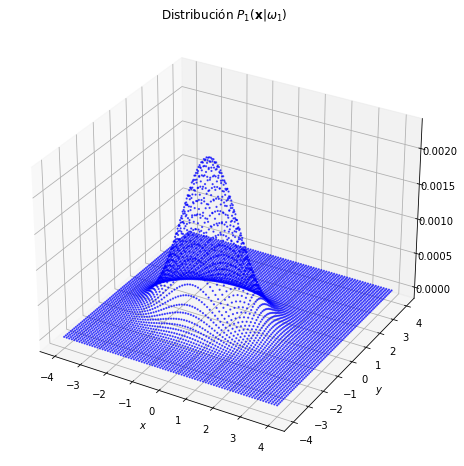

In [15]:
#Distribución P1
R = np.arange(-4,4+1e-9,0.1)
X,Y = np.meshgrid(R,R)
Z1=np.sum(np.exp(-0.5*(X+0.5)**2-(Y+0.5)**2))
P1=(1/Z1)*np.exp(-0.5*(X+0.5)**2-(Y+0.5)**2)
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,P1,color = "blue", s=1.5,alpha=0.6)
plt.title('Distribución $P_1(\mathbf{x}|\omega_1)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

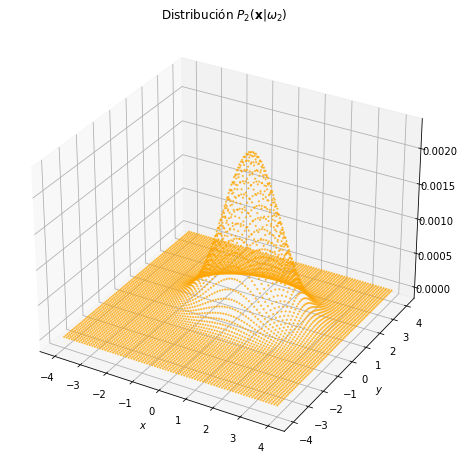

In [16]:
#Distribución P2
Z2=np.sum(np.exp(-0.5*(X-0.5)**2-(Y-0.5)**2))
P2=(1/Z2)*np.exp(-0.5*(X-0.5)**2-(Y-0.5)**2)
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,P2,color = "orange", s=1.5,alpha=0.6)
plt.title('Distribución $P_2(\mathbf{x}|\omega_2)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

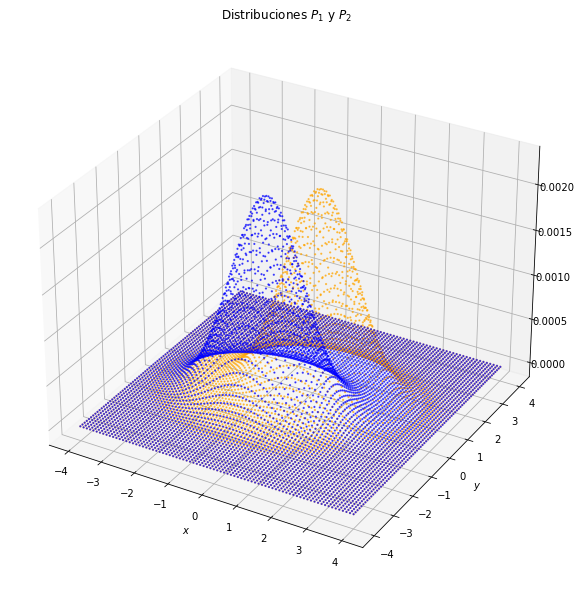

In [17]:
#Poniendo ambas distribuciones en la misma gráfica
fig=plt.figure(figsize=(10,13))
ax=plt.axes(projection='3d')
ax.scatter(X,Y,P1,s=1.5,alpha=0.6, color='blue')
ax.scatter(X,Y,P2,s=1.5,alpha=0.6, color='orange')
ax.elev = 30
plt.title('Distribuciones $P_1$ y $P_2$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

* **A partir de estas distribuciones, calcule la distribución de probabilidad total $P(\boldsymbol{x}) = \sum_{c \in \{1,2\}} P(\boldsymbol{x} | \omega_c) \cdot P (\omega_c)$ y grafíquelo.**

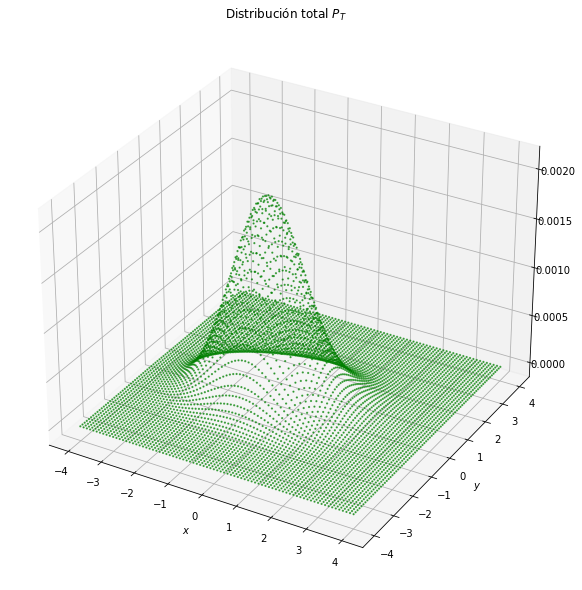

In [18]:
#Distribución de probabilidad total
PT=P1*0.9+P2*0.1
fig=plt.figure(figsize=(10,13))
ax=plt.axes(projection='3d')
ax.scatter(X,Y,PT,s=1.5,alpha=0.6, color='green')
ax.elev = 30
plt.title('Distribución total $P_T$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

* **Calcule y grafique las probabilidades posteriores de clase $P(\omega_1|\boldsymbol{x})$ y $P(\omega_2|\boldsymbol{x})$, e imprima la tasa de error de Bayes para el caso discretizado.**

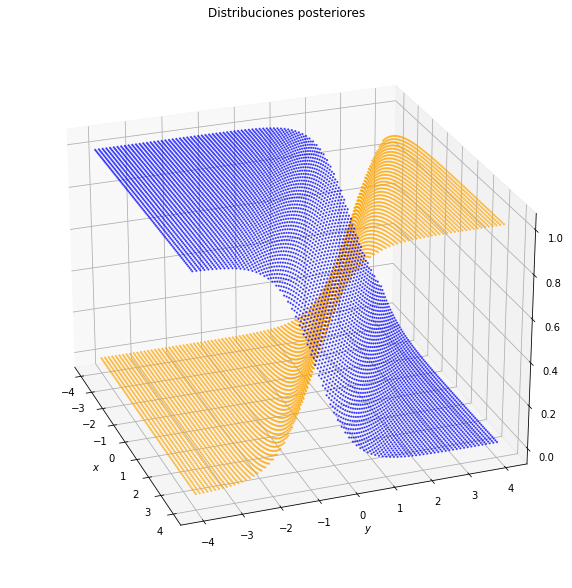

In [19]:
post1=P1*0.9/PT
post2=P2*0.1/PT
fig=plt.figure(figsize=(10,13))
ax=plt.axes(projection='3d')
ax.scatter(X,Y,post1,s=1.5,alpha=0.6, color='blue')
ax.scatter(X,Y,post2,s=1.5,alpha=0.6, color='orange')
ax.azim = -20
ax.dist = 10
ax.elev = 25
plt.title('Distribuciones posteriores')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

La tasa de error de Bayes está dada como
$$P(Err)=\int\text{mín}\{P(\mathbf{x}|\omega_1)P(\omega_1),P(\mathbf{x}|\omega_2)P(\omega_2)\}\,d\mathbf{x}$$
En el caso discreto tenemos entonces que
$$P(Err)=\sum_{\mathbf{x}}\text{mín}\{P(\mathbf{x}|\omega_1)P(\omega_1),P(\mathbf{x}|\omega_2)P(\omega_2)\}$$

In [20]:
B1=0.9*P1
B2=0.1*P2
Min=[]

for i in range(81):
    for j in range(81):
        m=min(B1[i,j],B2[i,j])
        Min.append(m)

ErrBayes=np.sum(Min)
print(ErrBayes)

0.08042117524744927


De aquí vemos que la tasa de error de Bayes en este caso es del $8.04\%$.

## Ejercicio 3: Reducción de la Varianza (5+5 P)

Suponga que la distribución de generación de datos para la segunda clase cambia para producir muestras mucho más cercanas a la media. Esta reducción de varianza para la segunda clase se implementa manteniendo la primera covarianza igual (es decir, $\Sigma_1 = \Sigma$) y dividiendo la segunda matriz de covarianza por 4 (es decir, $\Sigma_2 = \Sigma/4$). Para este nuevo conjunto de parámetros, podemos realizar el mismo análisis que en el Ejercicio 2.

* **Represente las probabilidades posteriores de la nueva clase $P(\omega_1|\boldsymbol{x})$ y $P(\omega_2|\boldsymbol{x})$ asociadas a las nuevas matrices de covarianza e imprima la nueva tasa de error de Bayes .**

Haciendo este cambio en la segunda clase, la nueva distribución estará dada como
$$P'_2(x,y)=\frac{1}{Z'_2}e^{-2\left[(x-0.5)^2+2(y-0.5)^2\right]}$$
con
$$Z'_2 = \sum_{x,y} e^{-2\left[(x-0.5)^2+2(y-0.5)^2\right]}$$

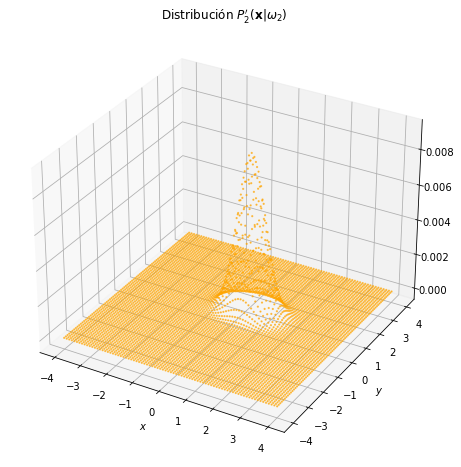

In [21]:
#Distribución P2'
Z_2=np.sum(np.exp(-2*(X-0.5)**2-4*(Y-0.5)**2))
P_2=(1/Z_2)*np.exp(-2*(X-0.5)**2-4*(Y-0.5)**2)
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,P_2,color = "orange", s=1.5,alpha=0.6)
plt.title('Distribución $P_2\'(\mathbf{x}|\omega_2)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

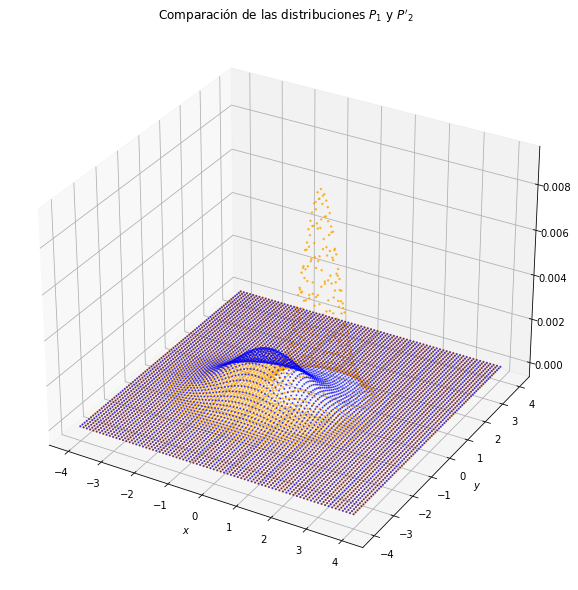

In [22]:
#Poniendo ambas distribuciones en la misma gráfica
fig=plt.figure(figsize=(10,13))
ax=plt.axes(projection='3d')
ax.scatter(X,Y,P1,s=1,alpha=0.6, color='blue')
ax.scatter(X,Y,P_2,s=2,alpha=0.7, color='orange')
ax.elev = 30
plt.title('Comparación de las distribuciones $P_1$ y $P\'_2$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

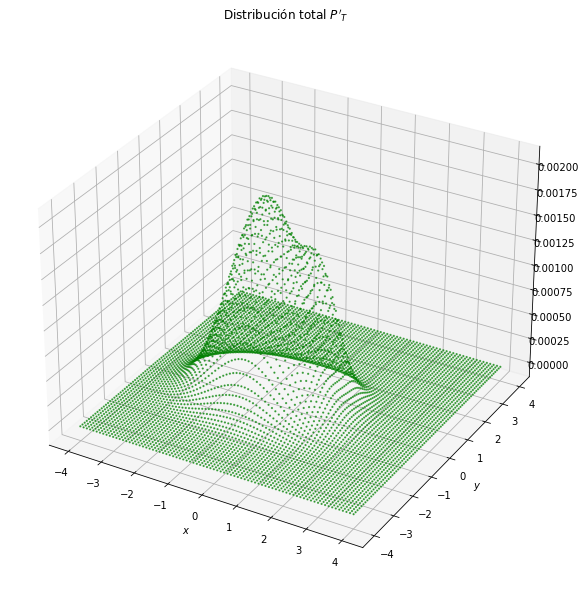

In [23]:
#Distribución de probabilidad total
P_T=P1*0.9+P_2*0.1
fig=plt.figure(figsize=(10,13))
ax=plt.axes(projection='3d')
ax.scatter(X,Y,P_T,s=1.5,alpha=0.6, color='green')
ax.elev = 30
plt.title('Distribución total $P\'_T$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

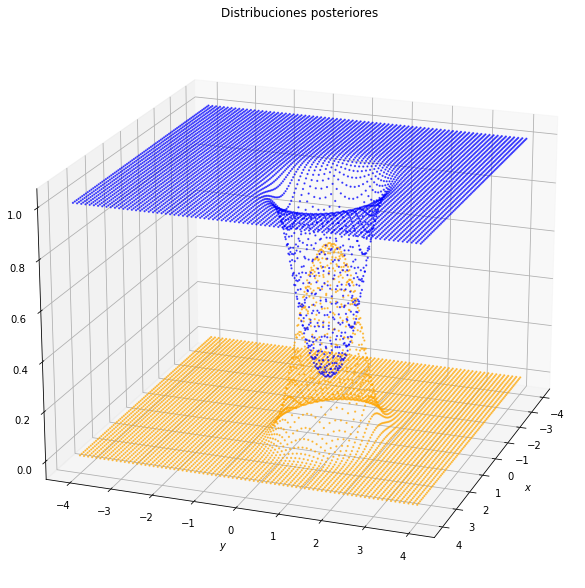

In [24]:
#Probabilidades posteriores de clase
post_1=P1*0.9/P_T
post_2=P_2*0.1/P_T
fig=plt.figure(figsize=(10,13))
ax=plt.axes(projection='3d')
ax.scatter(X,Y,post_1,s=1.5,alpha=0.6, color='blue')
ax.scatter(X,Y,post_2,s=1.5,alpha=0.6, color='orange')
ax.azim = 20
ax.dist = 9
ax.elev = 20
plt.title('Distribuciones posteriores')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [25]:
#Tasa de error de Bayes
B1=0.9*P1
B_2=0.1*P_2
M=[]

for i in range(81):
    for j in range(81):
        m=min(B1[i,j],B_2[i,j])
        M.append(m)

Err_Bayes=np.sum(M)
print(Err_Bayes)

0.07290780555695717


Notamos que en este caso la tasa de error de Bayes es del $7.29\%$

La intuición nos dice que mediante la reducción de la varianza y la concentración resultante de los datos generados para la clase 2 en una región más pequeña del espacio de entrada, debería ser más fácil predecir la clase 2 con certeza en esta ubicación. Paradójicamente, en este nuevo escenario "denso", observamos que la clase 2 no alcanza la certeza total en ningún lugar del espacio de entrada, mientras que sí lo hizo en el ejercicio anterior.

* **Explique esta paradoja.**

***Explicación:*** Esto ocurre porque aunque la segunda de las distribuciones se encuentre más "concentrada" (con mayor densidad) que la otra, aún así se está considerando su interacción con la primera en el error, y el aporte de esta en la región de la segunda no es nulo, con lo que se explica que no se tenga una certeza del $100\%$ nisiquiera en la región donde la segunda prevalece, y como podemos ver, lo más que se puede lograr al hacer esto es reducir el error aunque sea un poco.

<font size = 6>
<font color='red'>
Problemas de puntos extra 

Se pueden emplear para esta tarea o aquellas donde hayan salido más bajos.

# Problema 1 (0.5 puntos)

En países como Estados Unidos y Canadá los números telefónicos se conforman de 10 dígitos, normalmente separados en tres dígitos para el código de área, tres dígitos para el código de intercambio y cuatro dígitos para el código de estación. También pueden o no contener al inicio los dígitos +1 como código de país. En la práctica se tienen varias formas de representarlos:

In [26]:
from IPython.display import Image
#Image("1.png")

Escribe una función que reconozca todas las representaciones anteriores de un número telefónico. La función recibe el número telefónico y debe regresar True si el número es valido y False si el número no es valido. Algunos ejemplos de números telefónicos validos son:

In [27]:
#Image("2.png")

In [28]:
import re
def num_tel(N):
    A='\d{3}\.\d{3}\.\d{4}'
    B='\(\d{3}\) \d{3}\-\d{4}'
    C='1\-\d{3}-\d{3}-\d{4}'
    D='1 \d{3} \d{3} \d{4}'
    E='\+1 \d{3}-\d{3}-\d{4}'
    F='\+1 \d{3} \d{3}-\d{4}'
    if re.match(A,N) and len(N)==12:
        return True
    elif (re.match(C,N)or re.match(D,N)or re.match(B,N)) and len(N)==14:
        return True
    elif (re.match(E,N)or re.match(F,N)) and len(N)==15:
        return True
    else:
        return False

In [29]:
num_tel('1 333 333 3333')

True

# Problema 2 (0.1 puntos)

Regresa una lista con todos los nombres del siguiente string

In [30]:
s = "Juan decidió tomar el curso, convenció a su amigo Luis de inscribirlo"

In [31]:
S=re.split(' ',s)

In [32]:
nombres=[]
for i in S:
    if re.match('^[A-Z]',i):
        nombres.append(i)
print(nombres)

['Juan', 'Luis']


# Problema 3 (1 punto)

Considere el archivo data.txt. Este archivo registra el acceso que hace un usuario al visitar una página web. Cada línea del registro tiene los siguientes elementos:

     un anfitrión (por ejemplo, '146.204.224.152')
     un nombre de usuario (por ejemplo, 'feest6811' A veces falta el nombre de usuario. En este se usa '-' como valor para el nombre de usuario).
     la hora en que se realizó una solicitud (por ejemplo, '21/jun/2019:15:45:24 -0700')
     el tipo de solicitud de publicación (por ejemplo, 'POST /incentivize HTTP/1.1')

Convierta esto a una lista de diccionarios:

    ejemplo_dict = {"host":"146.204.224.152",

                 "nombre_de_usuario":"feest6811",
                 
                 "hora":"21/jun/2019:15:45:24 -0700",
                 
                 "solicitud":"POST /incentivar HTTP/1.1"}

In [33]:
data=open('data.txt','r')
datos=[t for t in data]
data.close()

print(datos)

['146.204.224.152 - feest6811 [21/Jun/2019:15:45:24 -0700] "POST /incentivize HTTP/1.1" 302 4622\n', '197.109.77.178 - kertzmann3129 [21/Jun/2019:15:45:25 -0700] "DELETE /virtual/solutions/target/web+services HTTP/2.0" 203 26554\n', '156.127.178.177 - okuneva5222 [21/Jun/2019:15:45:27 -0700] "DELETE /interactive/transparent/niches/revolutionize HTTP/1.1" 416 14701\n', '100.32.205.59 - ortiz8891 [21/Jun/2019:15:45:28 -0700] "PATCH /architectures HTTP/1.0" 204 6048\n', '168.95.156.240 - stark2413 [21/Jun/2019:15:45:31 -0700] "GET /engage HTTP/2.0" 201 9645\n', '71.172.239.195 - dooley1853 [21/Jun/2019:15:45:32 -0700] "PUT /cutting-edge HTTP/2.0" 406 24498\n', '180.95.121.94 - mohr6893 [21/Jun/2019:15:45:34 -0700] "PATCH /extensible/reinvent HTTP/1.1" 201 27330\n', '144.23.247.108 - auer7552 [21/Jun/2019:15:45:35 -0700] "POST /extensible/infrastructures/one-to-one/enterprise HTTP/1.1" 100 22921\n', '2.179.103.97 - lind8584 [21/Jun/2019:15:45:36 -0700] "POST /grow/front-end/e-commerce/robu

In [34]:
DATOS=[]

for k in datos:
    if k=='\n':
        pass
    else:
        dicc={'host':'' , 'user':'', 'hora':'' , 'solicitud':''}

        user_match=re.search('(- )(.+)( \[)',k)
        hora_match=re.search('(\[)(.+)(\])', k)
        sol_match=re.search('(\")(.+)(\")', k)

        dicc['host']=re.findall('(\d+\.\d+\.\d+\.\d+)',k)[0]
        if user_match:
            dicc['user']=user_match.group(2)
        if hora_match:
            dicc['hora']=hora_match.group(2)
        if sol_match:
            dicc['solicitud']=sol_match.group(2)
        DATOS.append(dicc)  

print(DATOS)

[{'host': '146.204.224.152', 'user': 'feest6811', 'hora': '21/Jun/2019:15:45:24 -0700', 'solicitud': 'POST /incentivize HTTP/1.1'}, {'host': '197.109.77.178', 'user': 'kertzmann3129', 'hora': '21/Jun/2019:15:45:25 -0700', 'solicitud': 'DELETE /virtual/solutions/target/web+services HTTP/2.0'}, {'host': '156.127.178.177', 'user': 'okuneva5222', 'hora': '21/Jun/2019:15:45:27 -0700', 'solicitud': 'DELETE /interactive/transparent/niches/revolutionize HTTP/1.1'}, {'host': '100.32.205.59', 'user': 'ortiz8891', 'hora': '21/Jun/2019:15:45:28 -0700', 'solicitud': 'PATCH /architectures HTTP/1.0'}, {'host': '168.95.156.240', 'user': 'stark2413', 'hora': '21/Jun/2019:15:45:31 -0700', 'solicitud': 'GET /engage HTTP/2.0'}, {'host': '71.172.239.195', 'user': 'dooley1853', 'hora': '21/Jun/2019:15:45:32 -0700', 'solicitud': 'PUT /cutting-edge HTTP/2.0'}, {'host': '180.95.121.94', 'user': 'mohr6893', 'hora': '21/Jun/2019:15:45:34 -0700', 'solicitud': 'PATCH /extensible/reinvent HTTP/1.1'}, {'host': '144.

# Problema 4 (0.1 puntos)

Sustituye las apariciones de la cadena "the the" por la cadena "the" del siguiente string:

s = "If the the problem is textual use the the re module"

In [35]:
s='If the the problem is textual use the the re module'

re.sub('the the', 'the', s)

'If the problem is textual use the re module'